<a href="https://colab.research.google.com/github/Kra09-kp/Image_classification_on_fashion_mnist/blob/main/image_classification_on_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification on Fashion_mnist dataset

In [25]:
#pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.

###Importing necessary libraries

In [1]:
import pandas as pd #import pandas for data handling
import numpy as np #import numpy for numerical operations
import matplotlib.pyplot as plt #import matplotlib for data visualization
#magic commands to display plots inline
%matplotlib inline
import seaborn as sns # importing seaborn for enhancing data visualization

#import scikit-learn libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix #for model evaluation

# import tensorflow and keras for deep learning
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential #import sequential model
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D #import various layers for neural networks
from tensorflow.keras.utils import to_categorical


In [2]:
# Loading and reading the dataset
train_df = pd.read_csv('fashion-mnist_train.csv') #training dataset
test_df = pd.read_csv('fashion-mnist_test.csv') #testing dataset

###Data Exploration

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f"Shape of training dataset : {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"Shape of testing dataset : {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

Shape of training dataset : 60000 rows and 785 columns.
Shape of testing dataset : 10000 rows and 785 columns.


In [6]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [7]:
# a dictionary that maps class indices to class name
class_names = {0:"T-shirt/Top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle Boot"}

# a function to calculate and print classwise statistics
def get_class(data):
  label_counts = data['label'].value_counts()
  total_samples = len(data)

  for k in range(len(label_counts)):
    label = class_names[label_counts.index[k]]
    count = label_counts[k]
    percent = (count/total_samples)*100
    print(f"{label} :     {count} or {percent}%")



In [8]:
get_class(train_df)

Pullover :     6000 or 10.0%
Ankle Boot :     6000 or 10.0%
Shirt :     6000 or 10.0%
T-shirt/Top :     6000 or 10.0%
Dress :     6000 or 10.0%
Coat :     6000 or 10.0%
Sandal :     6000 or 10.0%
Bag :     6000 or 10.0%
Sneaker :     6000 or 10.0%
Trouser :     6000 or 10.0%


In [9]:
# a function for ploting class wise distribution
def plot_class(data):
  f,ax = plt.subplots(1,1, figsize = (12,4))
  count_plot = sns.countplot(x = data['label'], hue_order= data["label"].value_counts().index)
  count_plot.set_title("Number of labels for each class")

  for p,label in zip(count_plot.patches, data["label"].value_counts().index):
    count_plot.annotate(class_names[label], (p.get_x(), p.get_height()+0.1))
  plt.show()

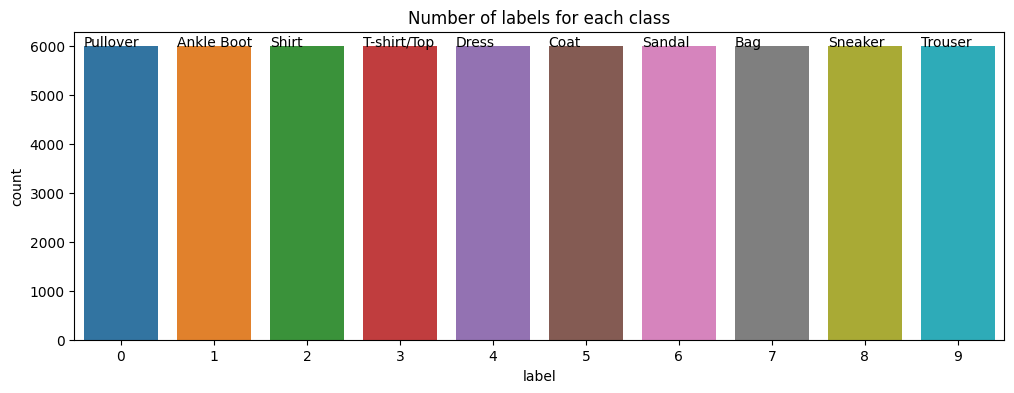

In [10]:
plot_class(train_df)

In [11]:
def preprocessing(raw_data):
  data_y =to_categorical(raw_data.label,10) # One hot encode labels,  there is 10 classs
  num_images = raw_data.shape[0] #get the number of images
  x_array = raw_data.values[:,1:] #extract the pixel values including the labels
  x_shaped_arr = x_array.reshape(num_images,28,28,1)
  data_x = x_shaped_arr/255 #normalize the pixel values
  return data_x,data_y

In [12]:
X,y = preprocessing(train_df)
X_test,y_test = preprocessing(test_df)

In [13]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=2023)

In [14]:
# shape of training and validation data
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


In [15]:
def get_class_count(d):
  df = pd.DataFrame(d)
  label_counts = df[0].value_counts()
  total = len(d)

  for i in range(len(label_counts)):
    label = class_names[label_counts.index[i]]
    count = label_counts[i]
    print("{:<20s} : {} ".format(label,count))


In [16]:
get_class_count(np.argmax(y_train, axis = 1))

Coat                 : 4806 
Sandal               : 4788 
Dress                : 4779 
T-shirt/Top          : 4828 
Shirt                : 4860 
Trouser              : 4844 
Pullover             : 4791 
Sneaker              : 4776 
Bag                  : 4768 
Ankle Boot           : 4760 


In [17]:
get_class_count(np.argmax(y_val,axis = 1))

Ankle Boot           : 1194 
Bag                  : 1212 
Sneaker              : 1221 
Pullover             : 1172 
Trouser              : 1140 
Shirt                : 1156 
T-shirt/Top          : 1209 
Dress                : 1224 
Sandal               : 1232 
Coat                 : 1240 


As we can see that there is imbalance in class distribution

In [ ]:
#Creating a model for classification
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_normal', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128,(3,3),activation = 'relu'),
    Dropout(0.4),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.3),
    Dense(10,activation = 'softmax')
])

In [19]:
# after creating a model we need to compile this
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [21]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 50,
                    validation_data = (X_val,y_val))

Epoch 1/50
375/375 [==============================] - 37s 98ms/step - loss: 0.7581 - accuracy: 0.7187 - val_loss: 0.4614 - val_accuracy: 0.8362
Epoch 2/50
375/375 [==============================] - 35s 94ms/step - loss: 0.4788 - accuracy: 0.8234 - val_loss: 0.3702 - val_accuracy: 0.8591
Epoch 3/50
375/375 [==============================] - 36s 97ms/step - loss: 0.4100 - accuracy: 0.8510 - val_loss: 0.3343 - val_accuracy: 0.8743
Epoch 4/50
375/375 [==============================] - 36s 97ms/step - loss: 0.3714 - accuracy: 0.8641 - val_loss: 0.2930 - val_accuracy: 0.8924
Epoch 5/50
375/375 [==============================] - 35s 94ms/step - loss: 0.3483 - accuracy: 0.8742 - val_loss: 0.2910 - val_accuracy: 0.8904
Epoch 6/50
375/375 [==============================] - 36s 96ms/step - loss: 0.3292 - accuracy: 0.8813 - val_loss: 0.2772 - val_accuracy: 0.8972
Epoch 7/50
375/375 [==============================] - 36s 97ms/step - loss: 0.3155 - accuracy: 0.8860 - val_loss: 0.2672 - val_accuracy:

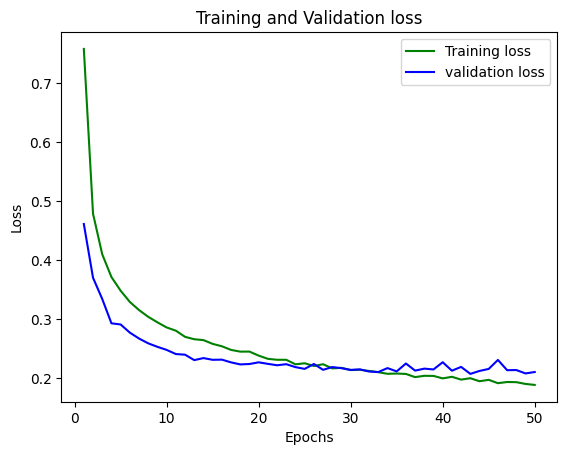

In [25]:
loss_train = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


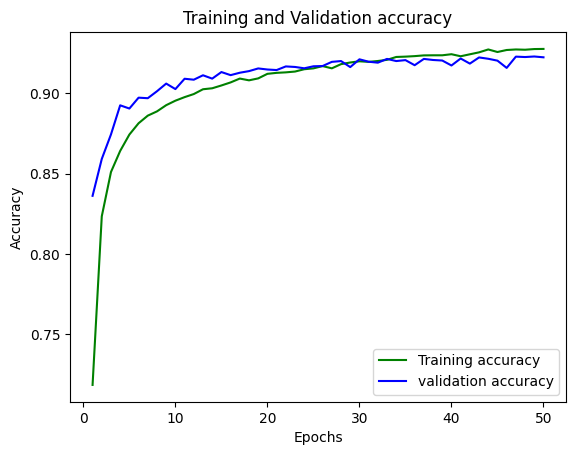

In [26]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
test_loss,test_accuracy =  model.evaluate(X_test,y_test,verbose = 1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.2045 - accuracy: 0.9262
Test Loss: 0.20447620749473572
Test Accuracy: 0.9261999726295471


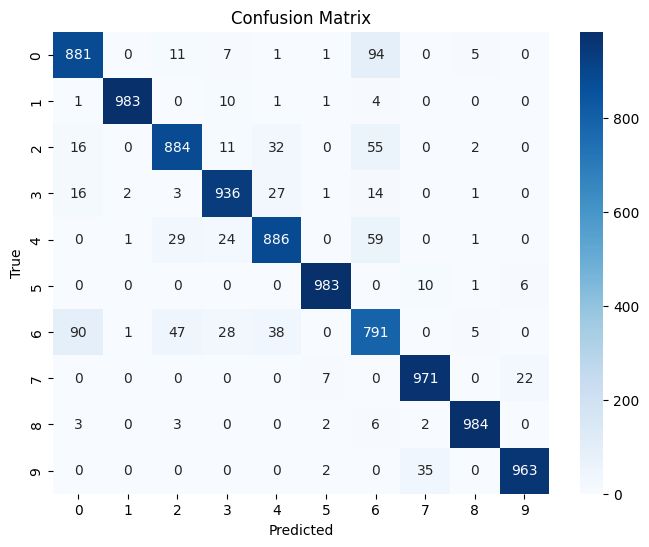

In [34]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis = 1),y_pred.argmax(axis = 1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
report = classification_report(y_test.argmax(axis = 1),y_pred.argmax(axis = 1))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.88      0.89      1000
           3       0.92      0.94      0.93      1000
           4       0.90      0.89      0.89      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.79      0.78      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [47]:
def plot_image(i,prediction_array, true_label,img):
  # extract the true label and image for the given index
  true_label,img =true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap = plt.cm.binary)
  # determine the predicted class by finding index with highest probability
  predicted_label = np.argmax(prediction_array)

  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100*np.max(prediction_array):2.0f}%)", color=color)
  plt.title(f"Actual: {class_names[true_label]}")

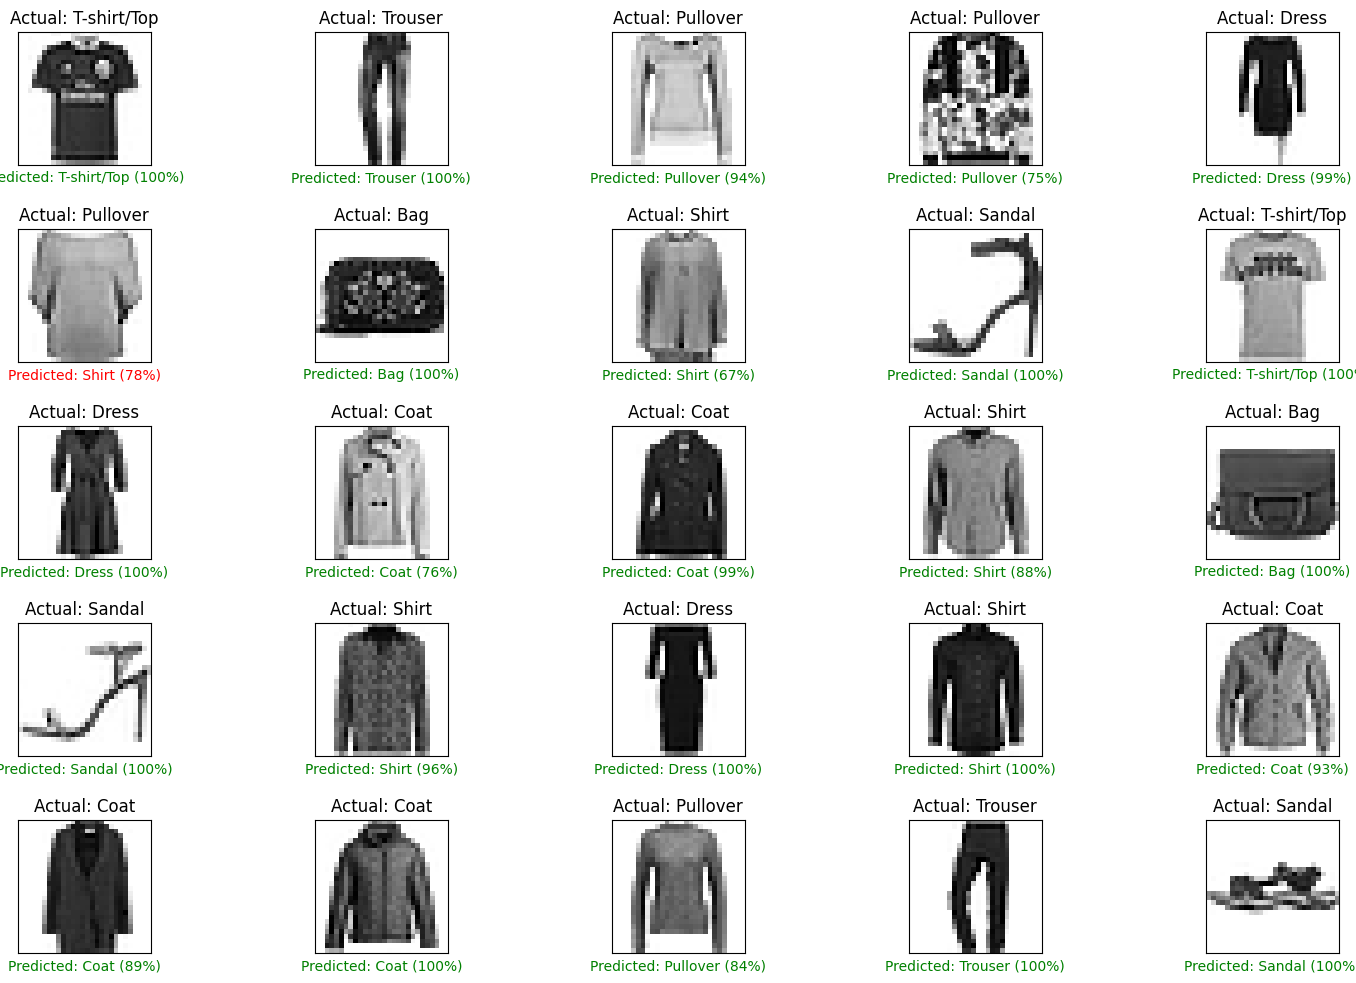

In [59]:
num_rows = 5
num_cols = 5
num_img = num_rows * num_cols

plt.figure(figsize=(3*num_cols, 2*num_rows))
for i in range(num_img):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], y_test.argmax(axis=1), X_test)

plt.tight_layout()
plt.show()